In [121]:
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from pylab import rcParams
rcParams['figure.figsize']= 15,6
rcParams["legend.loc"] = 'upper left' 
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 16
rcParams["font.size"] = 16

In [122]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../../data")
df = pd.read_csv(os.path.join(output_dir, "combined_queryfunction.csv"))
df_test = pd.read_csv(os.path.join(output_dir, "combined_queryfunctiontest.csv"))

df = df.sort_values(by="Time")
df.reset_index(inplace=True, drop=True)

df_test = df_test.sort_values(by="Time")
df_test.reset_index(inplace=True, drop=True)



df_minio = pd.read_csv(os.path.join(output_dir, "combined_qfminiodb.csv"))
df_minio_test = pd.read_csv(os.path.join(output_dir, "combined_qfminiodbtest.csv"))

df_minio = df_minio.sort_values(by="Time")
df_minio.reset_index(inplace=True, drop=True)

df_minio_test = df_minio_test.sort_values(by="Time")
df_minio_test.reset_index(inplace=True, drop=True)




df_mysql = pd.read_csv(os.path.join(output_dir, "combined_qfmysqlside.csv"))
df_mysql_test = pd.read_csv(os.path.join(output_dir, "combined_qfmysqlsidetest.csv"))

df_mysql = df_mysql.sort_values(by="Time")
df_mysql.reset_index(inplace=True, drop=True)

df_mysql_test = df_mysql_test.sort_values(by="Time")
df_mysql_test.reset_index(inplace=True, drop=True)




df = df.drop(df[df.responsetime > 10].index)
df.reset_index(inplace=True, drop=True)
df_mysql = df_mysql.drop(df_mysql[df_mysql.responsetime > 10].index)
df_mysql.reset_index(inplace=True, drop=True)
df_minio = df_minio.drop(df_minio[df_minio.responsetime > 10].index)
df_minio.reset_index(inplace=True, drop=True)


df_test = df_test.drop(df_test[df_test.responsetime > 10].index)
df_test.reset_index(inplace=True, drop=True)
df_mysql_test = df_mysql_test.drop(df_mysql_test[df_mysql_test.responsetime > 10].index)
df_mysql_test.reset_index(inplace=True, drop=True)
df_minio_test = df_minio_test.drop(df_minio_test[df_minio_test.responsetime > 10].index)
df_minio_test.reset_index(inplace=True, drop=True)




df["cpu_overall"] = df["cpu"]
df["mem_overall"] = df["mem"]

df["cpu_minio"] = df_minio["cpu"]
df["mem_minio"] = df_minio["mem"]

df["cpu_mysql"] = df_mysql["cpu"]
df["mem_mysql"] = df_mysql["mem"]


df_test["cpu_overall"] = df_test["cpu"]
df_test["mem_overall"] = df_test["mem"]

df_test["cpu_minio"] = df_minio_test["cpu"]
df_test["mem_minio"] = df_minio_test["mem"]

df_test["cpu_mysql"] = df_mysql_test["cpu"]
df_test["mem_mysql"] = df_mysql_test["mem"]


df.pop('Time')
df.pop('cpu')
df.pop('mem')

df_test.pop('Time')
df_test.pop('cpu')
df_test.pop('mem')
df.head()


,diskio,diskioRead,diskioWritten,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization,cpu_overall,mem_overall,cpu_minio,mem_minio,cpu_mysql,mem_mysql
0,0.011911,91.022222,63988.622222,1359.066667,11334.666667,1.0,1.0,3.146237,6.0,10.027778,1.240458e+10,37.051938,0.011273,0.023794,0.011479,0.026655,0.011601,0.028467
1,0.010933,91.022222,60529.777778,2975.533333,13780.555556,1.0,1.0,3.146237,6.0,9.805556,1.240458e+10,37.152930,0.011102,0.024748,0.011891,0.029182,0.245773,0.038052
2,0.012178,91.022222,65900.088889,4278.088889,14868.777778,1.0,2.0,2.961754,6.0,9.805556,1.240458e+10,37.152930,0.010917,0.024748,0.011891,0.029182,0.404026,0.038052
3,0.011200,91.022222,71270.400000,4589.688889,16162.377778,1.0,3.0,2.937924,6.0,9.822222,1.240458e+10,37.206769,0.470711,0.037479,0.182243,0.038862,0.011997,0.038862
4,0.012978,91.022222,71725.511111,3401.488889,14515.155556,1.0,3.0,3.010683,6.0,9.822222,1.240458e+10,37.206769,0.650069,0.037479,0.240302,0.038862,0.011997,0.038862


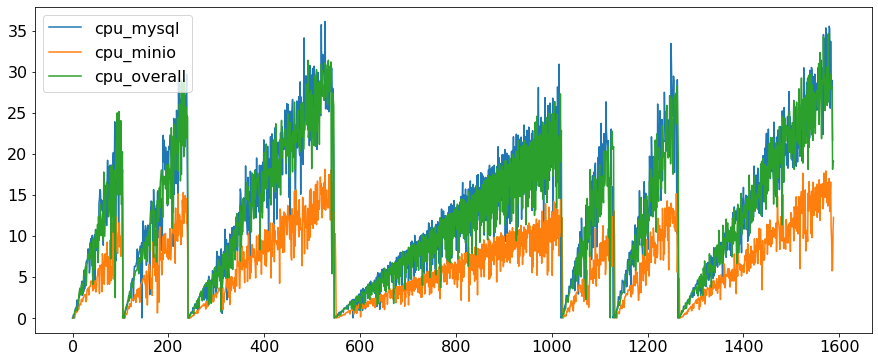

In [123]:
plt.plot( df['cpu_mysql'], label="cpu_mysql")
plt.plot(df['cpu_minio'], label="cpu_minio")
plt.plot(df['cpu_overall'], label="cpu_overall")
plt.legend()

In [124]:
df.totalmemory = df.totalmemory*1e-9

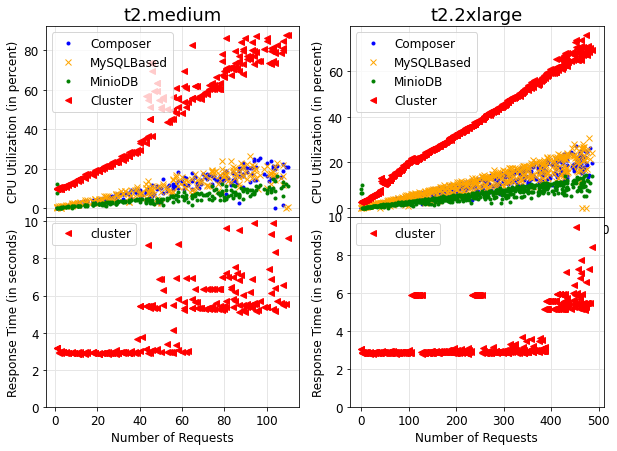

In [131]:
rcParams['figure.figsize'] = 10, 7
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 18
rcParams["font.size"] = 12
rcParams["legend.loc"] = 'upper left'
fig, ((ax1, ax4), (ax9, ax12)) = plt.subplots(2, 2)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax1.set_xlabel("Number of Requests")
ax1.set_ylabel("CPU Utilization (in percent)")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_overall'],'.', label = "Composer", color="blue")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_mysql'],'x', label = "MySQLBased", color="orange")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_minio'],'.', label = "MinioDB", color="green")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['totalcpuUtilization'],'<', label = "Cluster", color="red")
ax1.legend()
ax1.set_title("t2.medium")
ax4.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax4.set_xlabel("Number of Requests")
ax4.set_ylabel("CPU Utilization (in percent)")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_overall'], '.', label = "Composer", color="blue")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_mysql'], 'x', label = "MySQLBased", color="orange")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_minio'], '.', label = "MinioDB", color="green")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['totalcpuUtilization'], '<', label = "Cluster", color="red")
ax4.legend()
ax4.set_title("t2.2xlarge")

ax9.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax9.set_xlabel("Number of Requests")
ax9.set_ylabel("Response Time (in seconds)")
ax9.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['responsetime'],'<', label = "cluster", color="red")
ax9.legend()

ax9.yaxis.set_ticks(np.arange(0, 11, 2))
  
ax12.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax12.set_xlabel("Number of Requests")
ax12.set_ylabel("Response Time (in seconds)")
ax12.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['responsetime'], '<', label = "cluster", color="red")
ax12.legend()
ax12.yaxis.set_ticks(np.arange(0, 11, 2))

for ax in [ax1,  ax4, ax9,  ax12]:
    ax.get_yaxis().set_label_coords(-0.1, 0.5)
plt.subplots_adjust(hspace=.0)
plt.show()
fig.savefig('resultqf2.pdf',bbox_inches = 'tight',pad_inches = 0,  dpi=300)

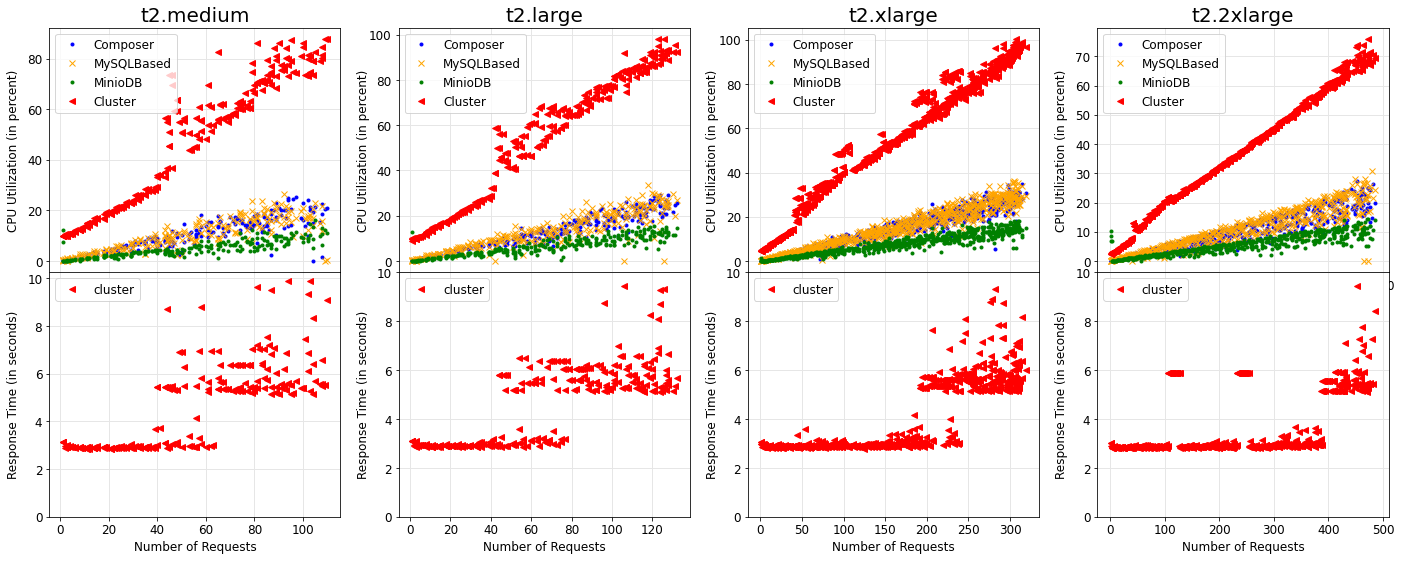

In [120]:
rcParams['figure.figsize'] = 24, 9
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
rcParams["legend.loc"] = 'upper left'
fig, ((ax1, ax2, ax3, ax4), (ax9,ax10,ax11, ax12)) = plt.subplots(2, 4)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax1.set_xlabel("Number of Requests")
ax1.set_ylabel("CPU Utilization (in percent)")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_overall'],'.', label = "Composer", color="blue")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_mysql'],'x', label = "MySQLBased", color="orange")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_minio'],'.', label = "MinioDB", color="green")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['totalcpuUtilization'],'<', label = "Cluster", color="red")
ax1.legend()
ax1.set_title("t2.medium")
ax2.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax2.set_xlabel("Number of Requests")
ax2.set_ylabel("CPU Utilization (in percent)")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_overall'], '.', label = "Composer", color="blue")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_mysql'], 'x', label = "MySQLBased", color="orange")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_minio'], '.', label = "MinioDB", color="green")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['totalcpuUtilization'], '<', label = "Cluster", color="red")
ax2.legend()
ax2.set_title("t2.large")
ax3.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax3.set_xlabel("Number of Requests")
ax3.set_ylabel("CPU Utilization (in percent)")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['cpu_overall'], '.',label = "Composer", color="blue")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['cpu_mysql'], 'x',label = "MySQLBased", color="orange")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['cpu_minio'], '.',label = "MinioDB", color="green")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['totalcpuUtilization'], '<',label = "Cluster", color="red")
ax3.legend()
ax3.set_title("t2.xlarge")
ax4.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax4.set_xlabel("Number of Requests")
ax4.set_ylabel("CPU Utilization (in percent)")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_overall'], '.', label = "Composer", color="blue")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_mysql'], 'x', label = "MySQLBased", color="orange")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_minio'], '.', label = "MinioDB", color="green")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['totalcpuUtilization'], '<', label = "Cluster", color="red")
ax4.legend()
ax4.set_title("t2.2xlarge")

ax9.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax9.set_xlabel("Number of Requests")
ax9.set_ylabel("Response Time (in seconds)")
ax9.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['responsetime'],'<', label = "cluster", color="red")
ax9.legend()

ax9.yaxis.set_ticks(np.arange(0, 11, 2))
    
    
ax10.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax10.set_xlabel("Number of Requests")
ax10.set_ylabel("Response Time (in seconds)")
ax10.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['responsetime'], '<', label = "cluster", color="red")
ax10.legend()
ax10.yaxis.set_ticks(np.arange(0, 11, 2))
  
ax11.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax11.set_xlabel("Number of Requests")
ax11.set_ylabel("Response Time (in seconds)")
ax11.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['responsetime'], '<',label = "cluster", color="red")
ax11.legend()
ax11.yaxis.set_ticks(np.arange(0, 11, 2))
  
ax12.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax12.set_xlabel("Number of Requests")
ax12.set_ylabel("Response Time (in seconds)")
ax12.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['responsetime'], '<', label = "cluster", color="red")
ax12.legend()
ax12.yaxis.set_ticks(np.arange(0, 11, 2))

for ax in [ax1, ax2, ax3, ax4, ax9, ax10, ax11, ax12]:
    ax.get_yaxis().set_label_coords(-0.1, 0.5)
plt.subplots_adjust(hspace=.0)
plt.show()
fig.savefig('resultqf2.pdf',bbox_inches = 'tight',pad_inches = 0,  dpi=300)

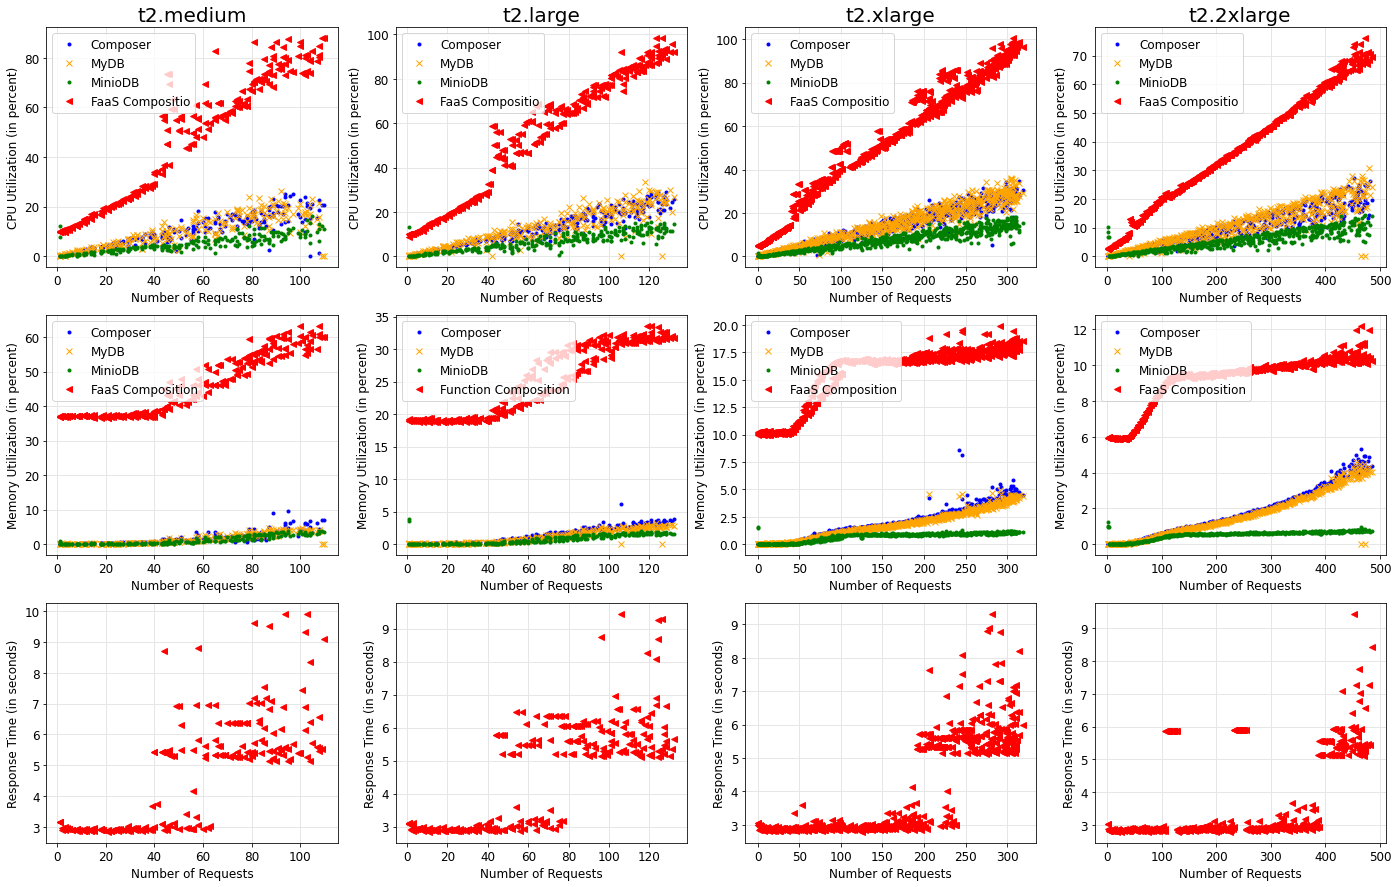

In [95]:
rcParams['figure.figsize'] = 24, 15
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
#rcParams["legend.loc"] = 'upper right'
fig, ((ax1, ax2, ax3, ax4),(ax5,ax6,ax7, ax8), (ax9,ax10,ax11, ax12)) = plt.subplots(3, 4)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax1.set_xlabel("Number of Requests")
ax1.set_ylabel("CPU Utilization (in percent)")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_overall'],'.', label = "Composer", color="blue")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_mysql'],'x', label = "MyDB", color="orange")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_minio'],'.', label = "MinioDB", color="green")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['totalcpuUtilization'],'<', label = "FaaS Compositio", color="red")
ax1.legend()
ax1.set_title("t2.medium")
ax2.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax2.set_xlabel("Number of Requests")
ax2.set_ylabel("CPU Utilization (in percent)")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_overall'], '.', label = "Composer", color="blue")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_mysql'], 'x', label = "MyDB", color="orange")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_minio'], '.', label = "MinioDB", color="green")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['totalcpuUtilization'], '<', label = "FaaS Compositio", color="red")
ax2.legend()
ax2.set_title("t2.large")
ax3.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax3.set_xlabel("Number of Requests")
ax3.set_ylabel("CPU Utilization (in percent)")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['cpu_overall'], '.',label = "Composer", color="blue")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['cpu_mysql'], 'x',label = "MyDB", color="orange")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['cpu_minio'], '.',label = "MinioDB", color="green")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['totalcpuUtilization'], '<',label = "FaaS Compositio", color="red")
ax3.legend()
ax3.set_title("t2.xlarge")
ax4.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax4.set_xlabel("Number of Requests")
ax4.set_ylabel("CPU Utilization (in percent)")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_overall'], '.', label = "Composer", color="blue")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_mysql'], 'x', label = "MyDB", color="orange")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['cpu_minio'], '.', label = "MinioDB", color="green")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['totalcpuUtilization'], '<', label = "FaaS Compositio", color="red")
ax4.legend()
ax4.set_title("t2.2xlarge")


ax5.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax5.set_xlabel("Number of Requests")
ax5.set_ylabel("Memory Utilization (in percent)")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_overall'],'.', label = "Composer", color="blue")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_mysql'],'x', label = "MyDB", color="orange")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_minio'],'.', label = "MinioDB", color="green")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['totalmemoryUtilization'],'<', label = "FaaS Composition", color="red")
ax5.legend()
ax1.set_title("t2.medium")
ax6.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax6.set_xlabel("Number of Requests")
ax6.set_ylabel("Memory Utilization (in percent)")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_overall'], '.', label = "Composer", color="blue")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_mysql'], 'x', label = "MyDB", color="orange")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_minio'], '.', label = "MinioDB", color="green")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['totalmemoryUtilization'], '<', label = "Function Composition", color="red")
ax6.legend()
ax2.set_title("t2.large")
ax7.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax7.set_xlabel("Number of Requests")
ax7.set_ylabel("Memory Utilization (in percent)")
ax7.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['mem_overall'], '.',label = "Composer", color="blue")
ax7.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['mem_mysql'], 'x',label = "MyDB", color="orange")
ax7.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['mem_minio'], '.',label = "MinioDB", color="green")
ax7.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['totalmemoryUtilization'], '<',label = "FaaS Composition", color="red")
ax7.legend()
ax3.set_title("t2.xlarge")
ax8.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax8.set_xlabel("Number of Requests")
ax8.set_ylabel("Memory Utilization (in percent)")
ax8.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['mem_overall'], '.', label = "Composer", color="blue")
ax8.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['mem_mysql'], 'x', label = "MyDB", color="orange")
ax8.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['mem_minio'], '.', label = "MinioDB", color="green")
ax8.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['totalmemoryUtilization'], '<', label = "FaaS Composition", color="red")
ax8.legend()
ax4.set_title("t2.2xlarge")


ax9.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax9.set_xlabel("Number of Requests")
ax9.set_ylabel("Response Time (in seconds)")
ax9.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['responsetime'],'<', label = "t2.medium", color="red")


ax10.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax10.set_xlabel("Number of Requests")
ax10.set_ylabel("Response Time (in seconds)")
ax10.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['responsetime'], '<', label = "t2.large", color="red")


ax11.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax11.set_xlabel("Number of Requests")
ax11.set_ylabel("Response Time (in seconds)")
ax11.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['responsetime'], '<',label = "t2.xlarge", color="red")


ax12.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax12.set_xlabel("Number of Requests")
ax12.set_ylabel("Response Time (in seconds)")
ax12.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['responsetime'], '<', label = "t2.2xlarge", color="red")


plt.show()
fig.savefig('resultqf2.pdf',bbox_inches = 'tight',pad_inches = 0,  dpi=300)

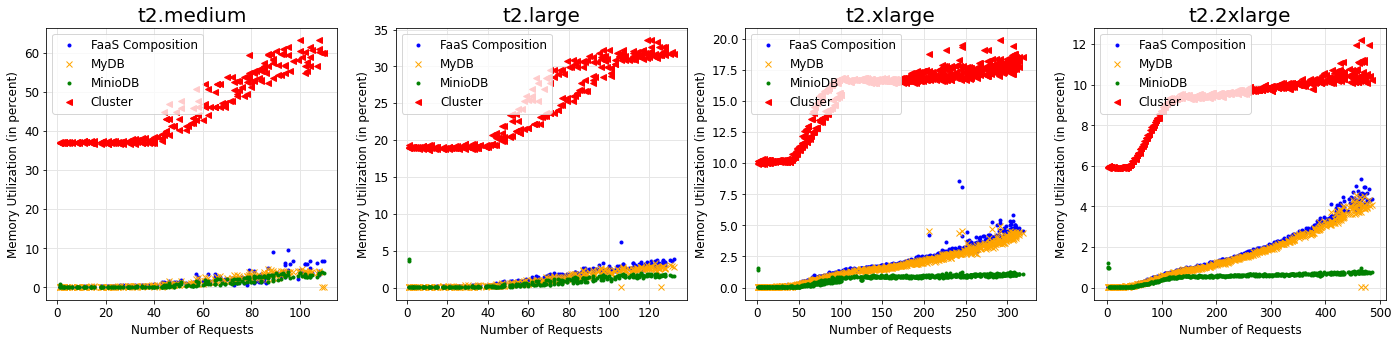

In [63]:
rcParams['figure.figsize'] = 24, 5
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
#rcParams["legend.loc"] = 'upper right'
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax1.set_xlabel("Number of Requests")
ax1.set_ylabel("Memory Utilization (in percent)")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_overall'],'.', label = "FaaS Composition", color="blue")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_mysql'],'x', label = "MyDB", color="orange")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_minio'],'.', label = "MinioDB", color="green")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['totalmemoryUtilization'],'<', label = "Cluster", color="red")
ax1.legend()
ax1.set_title("t2.medium")
ax2.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax2.set_xlabel("Number of Requests")
ax2.set_ylabel("Memory Utilization (in percent)")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_overall'], '.', label = "FaaS Composition", color="blue")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_mysql'], 'x', label = "MyDB", color="orange")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_minio'], '.', label = "MinioDB", color="green")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['totalmemoryUtilization'], '<', label = "Cluster", color="red")
ax2.legend()
ax2.set_title("t2.large")
ax3.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax3.set_xlabel("Number of Requests")
ax3.set_ylabel("Memory Utilization (in percent)")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['mem_overall'], '.',label = "FaaS Composition", color="blue")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['mem_mysql'], 'x',label = "MyDB", color="orange")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['mem_minio'], '.',label = "MinioDB", color="green")
ax3.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['totalmemoryUtilization'], '<',label = "Cluster", color="red")
ax3.legend()
ax3.set_title("t2.xlarge")
ax4.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax4.set_xlabel("Number of Requests")
ax4.set_ylabel("Memory Utilization (in percent)")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['mem_overall'], '.', label = "FaaS Composition", color="blue")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['mem_mysql'], 'x', label = "MyDB", color="orange")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['mem_minio'], '.', label = "MinioDB", color="green")
ax4.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['totalmemoryUtilization'], '<', label = "Cluster", color="red")
ax4.legend()
ax4.set_title("t2.2xlarge")

plt.legend()
plt.show()
fig.savefig('resultqf_mem.pdf',bbox_inches = 'tight',pad_inches = 0,  dpi=300)

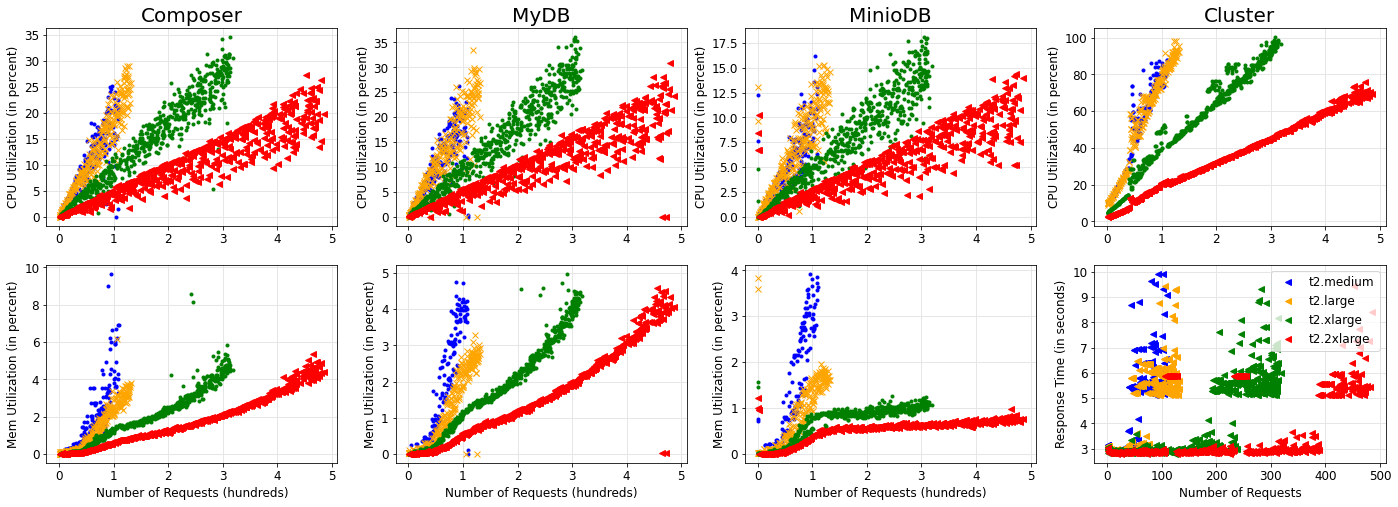

In [103]:
rcParams['figure.figsize'] = 24, 8
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
rcParams["legend.loc"] = 'upper right'
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax1.set_xlabel("Number of Requests (thousands)")
ax1.set_ylabel("CPU Utilization (in percent)")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_overall'],'.', label = "t2.medium", color="blue")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_overall'], 'x', label = "t2.large", color="orange")
ax1.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['cpu_overall'], '.',label = "t2.xlarge", color="green")
ax1.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['cpu_overall'], '<', label = "t2.2xlarge", color="red")
ax1.set_title("Composer")

ax2.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax2.set_xlabel("Number of Requests (thousands)")
ax2.set_ylabel("CPU Utilization (in percent)")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_mysql'],'.', label = "t2.medium", color="blue")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_mysql'], 'x', label = "t2.large", color="orange")
ax2.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['cpu_mysql'], '.',label = "t2.xlarge", color="green")
ax2.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['cpu_mysql'], '<', label = "t2.2xlarge", color="red")
ax2.set_title("MyDB")

ax3.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax3.set_xlabel("Number of Requests (thousands)")
ax3.set_ylabel("CPU Utilization (in percent)")
ax3.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_minio'],'.', label = "t2.medium", color="blue")
ax3.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_minio'], 'x', label = "t2.large", color="orange")
ax3.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['cpu_minio'], '.',label = "t2.xlarge", color="green")
ax3.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['cpu_minio'], '<', label = "t2.2xlarge", color="red")
ax3.set_title("MinioDB")

ax4.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax3.set_xlabel("Number of Requests (thousands)")
ax4.set_ylabel("CPU Utilization (in percent)")
ax4.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['totalcpuUtilization'],'.', label = "t2.medium", color="blue")
ax4.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['totalcpuUtilization'], 'x', label = "t2.large", color="orange")
ax4.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['totalcpuUtilization'], '.',label = "t2.xlarge", color="green")
ax4.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['totalcpuUtilization'], '<', label = "t2.2xlarge", color="red")
ax4.set_title("Cluster")


ax5.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax5.set_xlabel("Number of Requests (hundreds)")
ax5.set_ylabel("Mem Utilization (in percent)")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_overall'],'.', label = "t2.medium", color="blue")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_overall'], 'x', label = "t2.large", color="orange")
ax5.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['mem_overall'], '.',label = "t2.xlarge", color="green")
ax5.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['mem_overall'], '<', label = "t2.2xlarge", color="red")


ax6.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax6.set_xlabel("Number of Requests (hundreds)")
ax6.set_ylabel("Mem Utilization (in percent)")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_mysql'],'.', label = "t2.medium", color="blue")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_mysql'], 'x', label = "t2.large", color="orange")
ax6.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['mem_mysql'], '.',label = "t2.xlarge", color="green")
ax6.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['mem_mysql'], '<', label = "t2.2xlarge", color="red")

ax7.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax7.set_xlabel("Number of Requests (hundreds)")
ax7.set_ylabel("Mem Utilization (in percent)")
ax7.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_minio'],'.', label = "t2.medium", color="blue")
ax7.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_minio'], 'x', label = "t2.large", color="orange")
ax7.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['mem_minio'], '.',label = "t2.xlarge", color="green")
ax7.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['mem_minio'], '<', label = "t2.2xlarge", color="red")


ax8.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax8.set_xlabel("Number of Requests")
ax8.set_ylabel("Response Time (in seconds)")
ax8.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['responsetime'],'<', label = "t2.medium", color="blue")


ax8.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax8.set_xlabel("Number of Requests")
ax8.set_ylabel("Response Time (in seconds)")
ax8.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests'], df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['responsetime'], '<', label = "t2.large", color="orange")


ax8.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax8.set_xlabel("Number of Requests")
ax8.set_ylabel("Response Time (in seconds)")
ax8.plot(df[df.totalcpu == 12]['requests'], df[df.totalcpu == 12]['responsetime'], '<',label = "t2.xlarge", color="green")


ax8.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax8.set_xlabel("Number of Requests")
ax8.set_ylabel("Response Time (in seconds)")
ax8.plot(df[df.totalcpu > 12]['requests'], df[df.totalcpu > 12]['responsetime'], '<', label = "t2.2xlarge", color="red")




plt.legend()
plt.show()
fig.savefig('resultqf.pdf',bbox_inches = 'tight',pad_inches = 0,  dpi=300)

In [ ]:
rcParams['figure.figsize'] = 24, 8
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
rcParams["legend.loc"] = 'upper right'
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax1.set_xlabel("Number of Requests (thousands)")
ax1.set_ylabel("CPU Utilization (in percent)")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_overall'],'.', label = "t2.medium", color="blue")
ax1.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_overall'], 'x', label = "t2.large", color="orange")
ax1.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['cpu_overall'], '.',label = "t2.xlarge", color="green")
ax1.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['cpu_overall'], '<', label = "t2.2xlarge", color="red")
ax1.set_title("Composer")

ax2.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax2.set_xlabel("Number of Requests (thousands)")
ax2.set_ylabel("CPU Utilization (in percent)")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_mysql'],'.', label = "t2.medium", color="blue")
ax2.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_mysql'], 'x', label = "t2.large", color="orange")
ax2.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['cpu_mysql'], '.',label = "t2.xlarge", color="green")
ax2.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['cpu_mysql'], '<', label = "t2.2xlarge", color="red")
ax2.set_title("MyDB")

ax3.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax3.set_xlabel("Number of Requests (thousands)")
ax3.set_ylabel("CPU Utilization (in percent)")
ax3.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['cpu_minio'],'.', label = "t2.medium", color="blue")
ax3.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['cpu_minio'], 'x', label = "t2.large", color="orange")
ax3.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['cpu_minio'], '.',label = "t2.xlarge", color="green")
ax3.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['cpu_minio'], '<', label = "t2.2xlarge", color="red")
ax3.set_title("MinioDB")

ax4.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
#ax3.set_xlabel("Number of Requests (thousands)")
ax4.set_ylabel("CPU Utilization (in percent)")
ax4.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['totalcpuUtilization'],'.', label = "t2.medium", color="blue")
ax4.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['totalcpuUtilization'], 'x', label = "t2.large", color="orange")
ax4.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['totalcpuUtilization'], '.',label = "t2.xlarge", color="green")
ax4.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['totalcpuUtilization'], '<', label = "t2.2xlarge", color="red")
ax4.set_title("Cluster")


ax5.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax5.set_xlabel("Number of Requests (hundreds)")
ax5.set_ylabel("Mem Utilization (in percent)")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_overall'],'.', label = "t2.medium", color="blue")
ax5.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_overall'], 'x', label = "t2.large", color="orange")
ax5.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['mem_overall'], '.',label = "t2.xlarge", color="green")
ax5.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['mem_overall'], '<', label = "t2.2xlarge", color="red")


ax6.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax6.set_xlabel("Number of Requests (hundreds)")
ax6.set_ylabel("Mem Utilization (in percent)")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_mysql'],'.', label = "t2.medium", color="blue")
ax6.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_mysql'], 'x', label = "t2.large", color="orange")
ax6.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['mem_mysql'], '.',label = "t2.xlarge", color="green")
ax6.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['mem_mysql'], '<', label = "t2.2xlarge", color="red")

ax7.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax7.set_xlabel("Number of Requests (hundreds)")
ax7.set_ylabel("Mem Utilization (in percent)")
ax7.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_minio'],'.', label = "t2.medium", color="blue")
ax7.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_minio'], 'x', label = "t2.large", color="orange")
ax7.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['mem_minio'], '.',label = "t2.xlarge", color="green")
ax7.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['mem_minio'], '<', label = "t2.2xlarge", color="red")


ax8.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax8.set_xlabel("Number of Requests (hundreds)")
ax8.set_ylabel("Mem Utilization (in percent)")
ax8.plot(df[(df.totalcpu == 6) & (df.totalmemory >12) & (df.totalmemory < 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 12) & (df.totalmemory < 25)]['mem_minio'],'.', label = "t2.medium", color="blue")
ax8.plot(df[(df.totalcpu == 6) & (df.totalmemory > 25)]['requests']/100, df[(df.totalcpu == 6) & (df.totalmemory > 25) ]['mem_minio'], 'x', label = "t2.large", color="orange")
ax8.plot(df[df.totalcpu == 12]['requests']/100, df[df.totalcpu == 12]['mem_minio'], '.',label = "t2.xlarge", color="green")
ax8.plot(df[df.totalcpu > 12]['requests']/100, df[df.totalcpu > 12]['mem_minio'], '<', label = "t2.2xlarge", color="red")



plt.legend()
plt.show()
fig.savefig('resultqf.pdf',bbox_inches = 'tight',pad_inches = 0,  dpi=300)

In [30]:
# remove 2xlarge
df = df.drop(df[df.totalcpu > 16].index)

In [31]:
df_t = df[['cpu_overall', 'requests', 'replica', 'responsetime', 'totalcpu']].copy()
df_ttest = df_test[['cpu_overall', 'requests', 'replica', 'responsetime', 'totalcpu']].copy()

In [32]:
df_t = pd.get_dummies(df_t, prefix='', prefix_sep='')

In [33]:
df_t.shape

(1114, 5)

In [34]:
train_dataset = df_t.sample(frac=0.8, random_state=0)
val_dataset = df_t.drop(train_dataset.index)
test_dataset = df_ttest

In [35]:
#sns.pairplot(train_dataset[['total_cpu_util', 'total_mem_util', 'responsetime', 'requests']], diag_kind='kde')

In [36]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cpu_overall,891.0,13.699246,8.475582,0.005681,6.298002,13.701232,20.606051,34.599442
requests,891.0,123.160494,92.138245,1.000000,48.000000,96.000000,196.000000,314.000000
replica,891.0,33.299663,21.087645,1.000000,7.000000,50.000000,50.000000,50.000000
responsetime,891.0,4.321853,1.567380,2.790785,2.909816,3.172503,5.541688,9.907126
totalcpu,891.0,9.441077,2.969065,6.000000,6.000000,12.000000,12.000000,12.000000


In [37]:
train_features_orig = train_dataset.copy()
val_features = val_dataset.copy()
test_features = test_dataset.copy()

In [38]:
train_features_orig.head()

,cpu_overall,requests,replica,responsetime,totalcpu
1481,11.328622,229.0,50.0,5.604232,12.0
1584,28.174452,303.0,50.0,5.980909,12.0
187,14.844163,84.0,31.0,6.047526,6.0
1371,10.603799,111.0,50.0,2.883349,12.0
413,15.528162,204.0,50.0,2.890544,12.0


In [39]:
train_features_orig = train_features_orig.dropna()

In [40]:
train_features_orig.isnull().values.any()

False

In [41]:
train_labels_orig = train_features_orig.pop('requests')
val_labels = val_features.pop('requests')
test_labels = test_features.pop('requests')

In [42]:
input = np.array(train_features_orig)

In [43]:

input_normalizer = preprocessing.Normalization(input_shape=[3,])
input_normalizer.adapt(input)

In [44]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 28000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [requests]')
  plt.legend()
  plt.grid(True)
  return plt.show()

In [45]:
def plot_training(train_labels, train_predictions):
    #a = plt.axes(aspect='equal')
    plt.scatter(range(0,len(train_labels)),train_labels, label="actual")
    plt.scatter(range(0,len(train_predictions)), train_predictions,  label="predicted")
    plt.legend()
    plt.xlabel('Unit Time')
    plt.ylabel('train requests')
    #lims = [0, 1]
    #plt.xlim(lims)
    #plt.ylim(lims)
    #_ = plt.plot()
    return plt.show()
def plot_prediction(test_labels, test_predictions):
    #a = plt.axes(aspect='equal')
    plt.scatter(range(0,len(test_labels)),test_labels, label="actual")
    plt.scatter(range(0,len(test_labels)), test_predictions,  label="predicted")
    plt.legend()
    plt.xlabel('Unit Time')
    plt.ylabel('requests')
    #lims = [0, 1]
    #plt.xlim(lims)
    #plt.ylim(lims)
    #_ = plt.plot()
    return plt.show()

In [46]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
from keras import regularizers

def build_and_compile_autoencodermodel(input_shape):
    input_img = keras.Input(shape=(input_shape,))
    #encoded = layers.Dense(512, activation='relu')(input_img)
    #encoded = layers.Dense(256, activation='relu')(encoded)
    #encoded = layers.Dense(128, activation='relu')(encoded)
    #encoded = layers.Dense(64, activation='relu')(encoded)
    encoded = layers.Dense(32, activation='relu')(input_img)
    encoded = layers.Dense(5, activation='relu')(encoded)
    
    decoded = layers.Dense(32, activation='relu')(encoded)
    #decoded = layers.Dense(64, activation='relu')(decoded)
    #decoded = layers.Dense(128, activation='relu')(decoded)
    #decoded = layers.Dense(256, activation='relu')(decoded)
    #decoded = layers.Dense(512, activation='relu')(decoded)
    decoded = layers.Dense(input_shape, activation='sigmoid')(decoded)
    
    #model.compile(loss='mean_absolute_error',
    #            optimizer=tf.keras.optimizers.Adam(0.001))
    
    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile("adam", loss='mae')

    return autoencoder


def build_and_compile_model(norm):
  model = None
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu',name="dense_one"),
      layers.Dense(64, activation='relu',name="dense_two"),
      layers.Dense(32, activation='relu',name="dense_three"),
      layers.Dense(1, activation='sigmoid',name="dense_four")
  ])
  #model.add(layers.Embedding(input_dim=64, output_dim=64))  
  #model.add(layers.LSTM(128))
  #model.add(layers.Dense(1, activation='sigmoid'))  
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [47]:
from sklearn.decomposition import PCA # for PCA calculation
from sklearn.preprocessing import StandardScaler # for standardizing the Data

In [60]:
from sklearn.decomposition import PCA # for PCA calculation
from sklearn.preprocessing import MinMaxScaler # for standardizing the Data
X = train_features_orig.values # getting all values as a matrix of dataframe 
sc = MinMaxScaler() # creating a StandardScaler object

y = train_labels_orig.values
sc_label = MinMaxScaler() # creating a StandardScaler object
y_std = sc_label.fit_transform(y.reshape(-1, 1)) # standardizing the data

X_std = sc.fit_transform(X) # standardizing the data

pca = PCA()
X_pca = pca.fit(X_std)

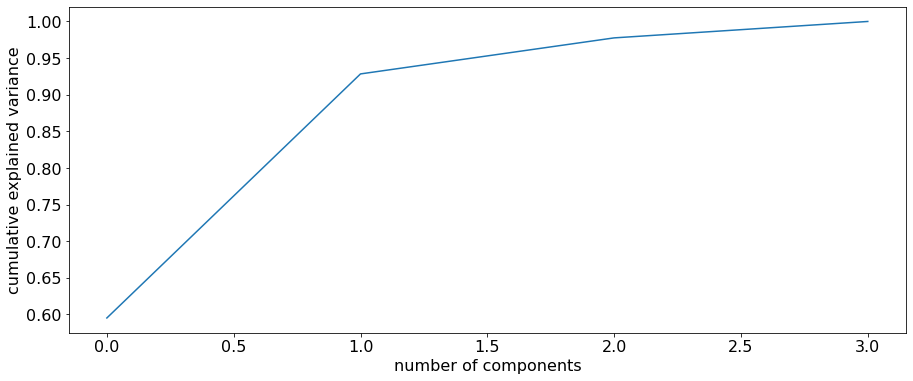

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [62]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

4


In [63]:
test_features = test_dataset.copy()
test_labels = test_features.pop('requests')
X_test = test_features.values # getting all values as a matrix of dataframe 
X_test_std = sc.transform(X_test) # standardizing the data
X_test_pca = pca.transform(X_test_std) # this will fit and reduce dimensions

#y_test_std = sc_label.transform(test_labels) # standardizing the data
X = X_pca

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_11 (Normalizat (None, 4)                 9         
_________________________________________________________________
dense_one (Dense)            (None, 128)               640       
_________________________________________________________________
dense_two (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_three (Dense)          (None, 32)                2080      
_________________________________________________________________
dense_four (Dense)           (None, 1)                 33        
Total params: 11,018
Trainable params: 11,009
Non-trainable params: 9
_________________________________________________________________
None


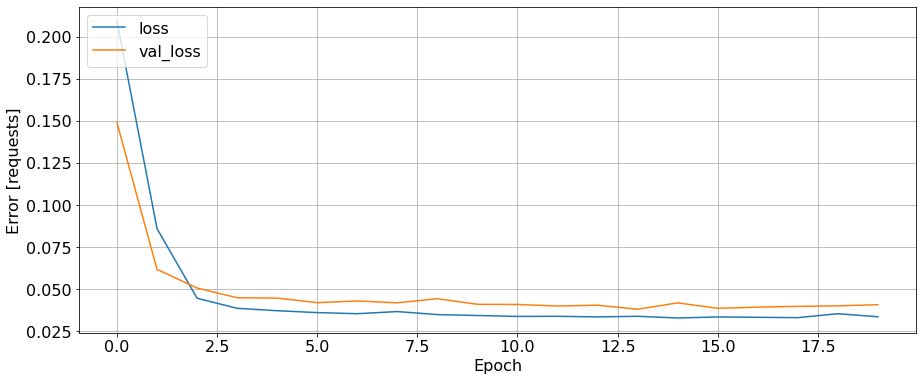

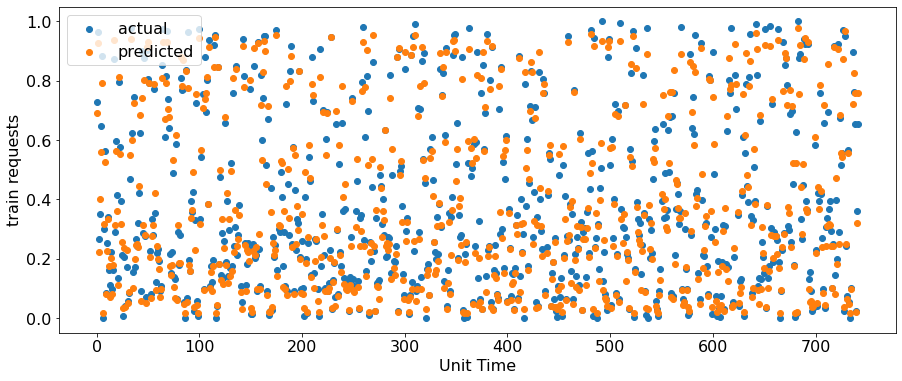

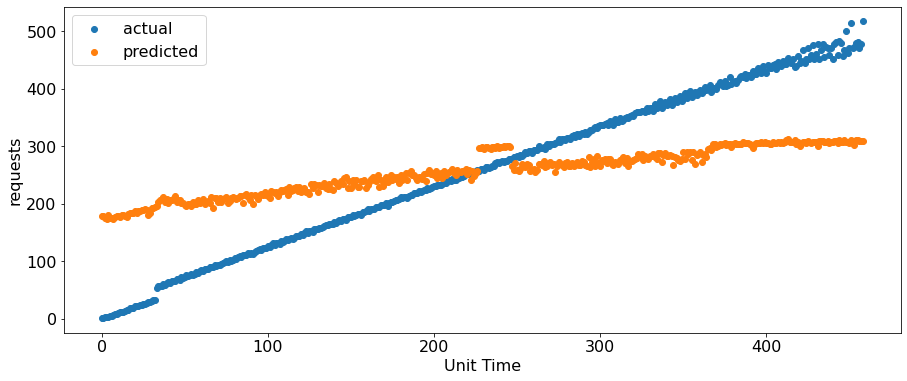

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_12 (Normalizat (None, 4)                 9         
_________________________________________________________________
dense_one (Dense)            (None, 128)               640       
_________________________________________________________________
dense_two (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_three (Dense)          (None, 32)                2080      
_________________________________________________________________
dense_four (Dense)           (None, 1)                 33        
Total params: 11,018
Trainable params: 11,009
Non-trainable params: 9
_________________________________________________________________
None


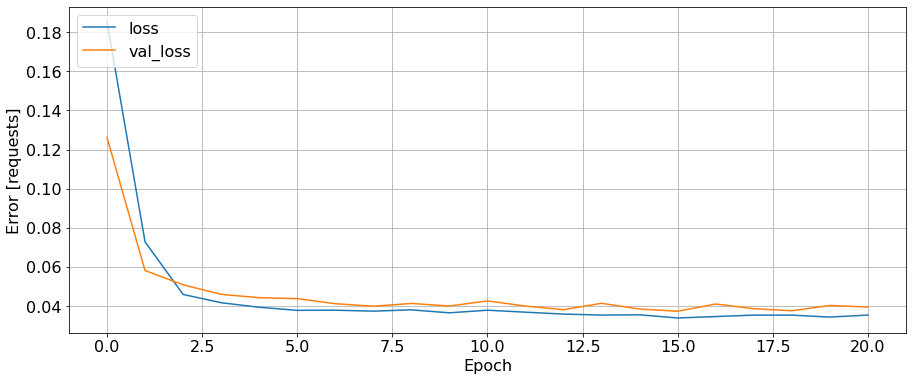

KeyboardInterrupt: 

In [64]:
#%%time

i = 0
loss, score, model = [], [], []
hist = np.empty([6,])
# k fold
kf = KFold(n_splits=6, random_state=42, shuffle=True)
for train_index, test_index in kf.split(X): 
    train_features, val_features = X[train_index], X[test_index]
    train_labels, val_labels = y_std[train_index], y_std[test_index]

# Divide dataset
#train_dataset = df_t.sample(frac=0.8, random_state=0)
#val_dataset = df_t.drop(train_dataset.index)
#test_dataset = df_ttest

#train_features = train_dataset.copy()
#val_features = val_dataset.copy()
#test_features = test_dataset.copy()

# Create labels
#train_labels = train_features.pop('requests')
#val_labels = val_features.pop('requests')
#test_labels = test_features.pop('requests')

# Normalization
    input = np.array(train_features)
    input_normalizer = preprocessing.Normalization(input_shape=[train_features.shape[1],])
    input_normalizer.adapt(input)

# Create Model
    dnn_model = None
    dnn_model = build_and_compile_model(input_normalizer)

    print(dnn_model.summary())

    history = dnn_model.fit(
        train_features, train_labels,
        validation_split=0.2,
        verbose=0, epochs=3000,callbacks=[callback])
    #print(history)
    plot_loss(history)
    loss.append(dnn_model.evaluate(val_features, val_labels,verbose=0))
    ## Make Predictions
    train_predictions = dnn_model.predict(train_features).flatten()
    test_predictions = sc_label.inverse_transform(dnn_model.predict(X_test_pca).flatten().reshape(-1, 1))

    plot_training(train_labels, train_predictions)
    
    plot_prediction(test_labels, test_predictions)
    R = r2_score(test_labels, test_predictions)*100
    model.append('dnn_model_'+str(i))
    score.append(R)
    i = i+1
    #test_results['dnn_model_'+str(i)] = [dnn_model.evaluate(
    #    val_features, val_labels,
    #    verbose=0), R]
model = np.array(model)
score = np.array(score)
loss = np.array(loss)

In [54]:
data = np.array([model, loss, score]).T
pd.DataFrame(data,columns=["model", "loss", "score"])

,model,loss,score
0,dnn_model_0,0.040340084582567215,26.13954099513398
1,dnn_model_1,0.032209061086177826,52.84652865032618
2,dnn_model_2,0.03527737781405449,54.69328924559454
3,dnn_model_3,0.03934638202190399,53.55871550956197
4,dnn_model_4,0.03236076980829239,59.19012886750865
5,dnn_model_5,0.03541293740272522,25.83281048965492


In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins=100)
plt.xlabel('Prediction Error [requests]')
_ = plt.ylabel('Count')